In [46]:
!dir
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import skimage
from skimage.color import rgb2gray
from skimage.morphology import rectangle as rect , disk

from skimage.morphology import(binary_erosion, 
                               binary_dilation,
                               binary_closing,
                               binary_opening,
                               skeletonize,
                               thin
                              )
from skimage.measure import find_contours

from skimage.draw import rectangle
from skimage.draw import rectangle_perimeter
from skimage.filters import threshold_otsu


commonfunctions.py				 part1.ipynb
images						 __pycache__
[IP]\ Project\ F2020_\ Sheet\ Music\ Reader.pdf  README.md


In [11]:
# common functions

def get_bounding_boxes(img,box_aspect_ratio):
    """
    summary: this function returns
    parameter:
    img: is a binary image for which to find the contours 
    aspect_ratio: is a tuple where (low_aspect_ratio,high_aspect_ratio)
    """
    contours = find_contours(img,.8)
    bounding_boxes=[]
    for contour in contours:
        Xmin= np.min(contour[:,1])
        Xmax=np.max(contour[:,1]) 
        Ymin=np.min(contour[:,0])
        Ymax = np.max(contour[:,0])
        aspect_ratio = (Xmax-Xmin)/(Ymax-Ymin)
    #     aspect_ratio=1/aspect_ratio
        if aspect_ratio >= box_aspect_ratio[0] and aspect_ratio <= box_aspect_ratio[1]:
            bounding_boxes.append([Xmin,Xmax,Ymin,Ymax])
        
    return bounding_boxes
def get_bounded_image(img,bounding_boxes):
    conte = np.zeros(img.shape)
    for box in bounding_boxes:
        [Xmin, Xmax, Ymin, Ymax] = box
        rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
        rr = rr.astype(np.int)
        cc= cc.astype(np.int)
        conte[rr, cc] = 1 #set color white
    img2 = np.where(conte==1, img, 0)
    return img2
def draw_bounding_boxes(img,bounding_boxes):
    conte = np.zeros(img.shape)
    for box in bounding_boxes:
        [Xmin, Xmax, Ymin, Ymax] = box
        rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
        rr = rr.astype(np.int)
        cc= cc.astype(np.int)
        conte[rr, cc] = 1 #set color white
    img2 = np.where(conte==1, img, 0)
    show_images([conte,img2], ['bounding_boxes','original segmented'])

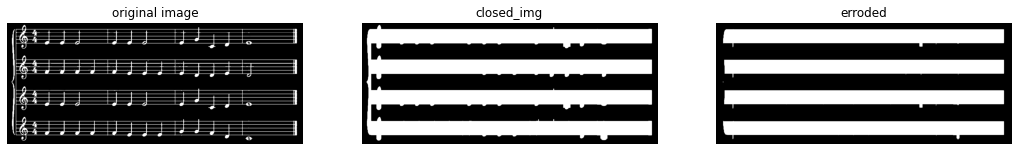

In [12]:
original_image = io.imread('images/music1.JPG')
gray_image = rgb2gray(original_image)
binary_image = binarize(gray_image)
inverted_image = 255 - binary_image
rows=17
cols=20
selem = rect(rows,cols)
closed_img = binary_closing(inverted_image,selem=selem)

selem = rect(3,20)
erroded_img = binary_erosion(closed_img,selem=selem)
show_images([inverted_image,closed_img,erroded_img],['original image','closed_img','erroded'])

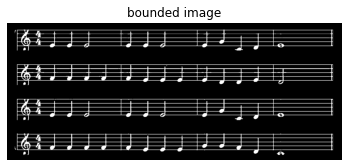

In [13]:
## let's find the contours
#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
# print(bounding_boxes)
bounding_boxes = get_bounding_boxes(erroded_img,(4,4000))
# draw_bounding_boxes(inverted_image,bounding_boxes)
bounded_image = get_bounded_image(inverted_image, bounding_boxes)
show_images([bounded_image],['bounded image'])

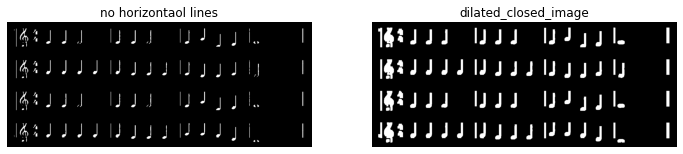

In [14]:
# let's remove thin horizontal lines
rows=5
cols=1
selem = rect(rows,cols)
no_horiz_line_image = binary_erosion(bounded_image,selem=selem)
rows=10
cols=10
selem = rect(rows,cols)
dilated_closed_image = binary_dilation(binary_closing(no_horiz_line_image,selem=selem),selem=selem)
dilated_closed_image = binary_erosion(dilated_closed_image, rect(3,3))
show_images([no_horiz_line_image,dilated_closed_image],['no horizontaol lines','dilated_closed_image'])


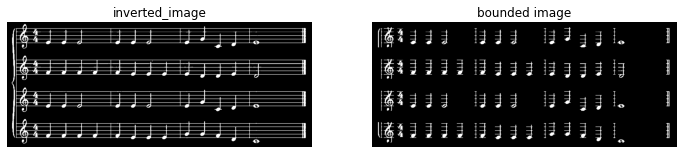

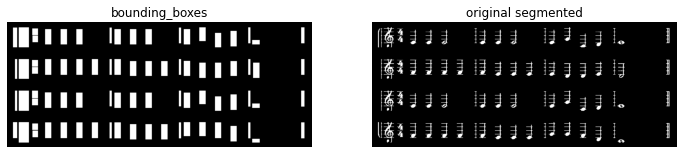

In [15]:
# let's get the bounding boxes for the individual symbols
bounding_boxes = get_bounding_boxes(dilated_closed_image,(0,4000))
# draw_bounding_boxes(inverted_image,bounding_boxes)
bounded_image = get_bounded_image(inverted_image, bounding_boxes)
show_images([inverted_image,bounded_image],['inverted_image','bounded image'])
draw_bounding_boxes(bounded_image,bounding_boxes)

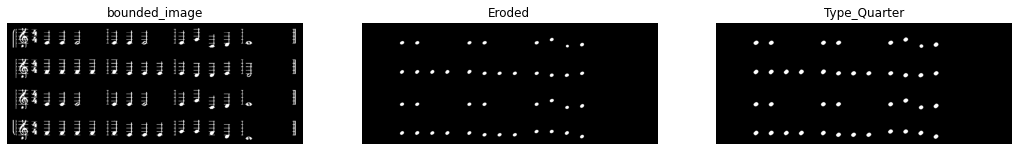

In [59]:
# Detect Quarter 

radius = 6
selem = disk(radius)

opened_image = binary_opening(bounded_image,selem)

radius = 2
selem = disk(radius)
Type_Quarter = binary_dilation(opened_image,selem)

show_images([bounded_image,eroded_image,Type_Quarter],['bounded_image','Eroded','Type_Quarter'])